In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from typing import Callable

# Optimization with SciPy

## What is optimization?

- Problem
- Constraints
- Objective function
- Gradient
- Problem type
- Dimensionality

## Have we done optimization already?

1. Classic example: Least-squares linear regression

## Example problem

What is the maximal rectangle area's length/height that can fit within a parabola?  Let a = 1, b = 7 for the parabola.

Variable names for the rectangle: l for length, h for height, origin_x, origin_y for the bottom-left origin of the rectangle.

In [28]:
def f_parabola(x: float, a: float, b: float) -> float:
    return -a * np.square(x) + b


def rect_area(x: np.ndarray, a: float, b: float, f_constraint: Callable) -> float:
    """
    Function for computing the area of a rectangle given a constraint 
      (f_parabola, for example) on the height.
    """
    length = np.abs(x) * 2.0
    height = f_constraint(x, a, b)
    return length * height


def f_rect_area(x: float, a: float, b: float) -> float:
    return -1.0 * rect_area(x, a, b, f_parabola)

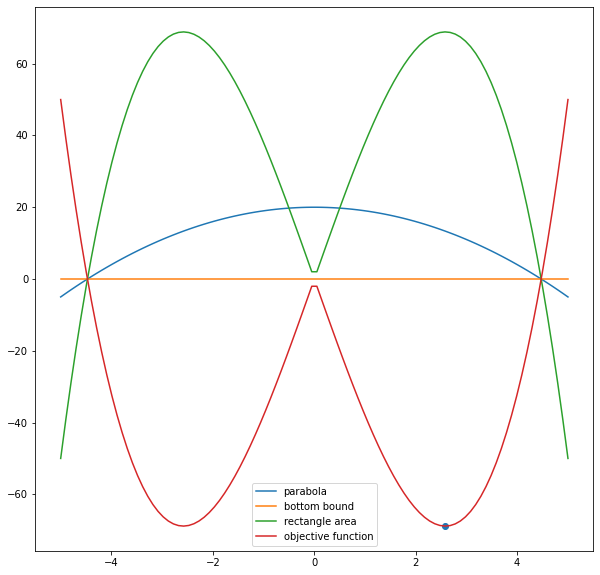

In [31]:
parabola_a = 1
parabola_b = 20

x_range = np.linspace(-5, 5, 100)
y_range = f_parabola(x_range, parabola_a, parabola_b)
plt.figure(figsize=(10, 10))
plt.plot(x_range, y_range, label="parabola")
plt.plot(x_range, np.zeros_like(x_range), '-', label="bottom bound")
a_range = rect_area(x_range, parabola_a, parabola_b)
plt.plot(x_range, a_range, '-', label="rectangle area")
f_range = f_rect_area(x_range, parabola_a, parabola_b)
plt.plot(x_range, f_range, '-', label="objective function")
plt.legend()
plt.scatter(2.58, -68.85)

In [30]:
opt_bounds = (0., 4.0)

scipy.optimize.minimize_scalar(f_rect_area, bounds=opt_bounds, args=(parabola_a, parabola_b))

     fun: -68.85303726590963
    nfev: 14
     nit: 9
 success: True
       x: 2.5819888970085727

## Fitting a rectangular prism under a paraboloid

This one is a little bit trickier.  We have to make a formulation that allows for origin_x and origin_y, where the height is the value of the paraboloid.